Load existing (saved) VS state, results, and metrics

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import lab.torch as B
import torch
import os, sys
import pickle
import pandas as pd

In [2]:
%load_ext autoreload
%autoreload 2

In [8]:
from varz import Vars, namespace
from wbml import experiment, out, plot

In [9]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [31]:
_dir = "../results/2022-06-06-16.09.32_plot-eval-10"
_wd = experiment.WorkingDirectory(_dir, observe=True, seed=0)

Root:       ../results/2022-06-06-16.09.32_plot-eval-10
Call:       /homes/mojb2/Thesis/GI-PVI/venv/lib/python3.7/site-packages/ipykernel_launcher.py --ip=127.0.0.1 --stdin=9008 --control=9006 --hb=9005 --Session.signature_scheme="hmac-sha256" --Session.key=b"e7895d98-0dea-4be8-8470-fa2903a79df7" --shell=9007 --transport="tcp" --iopub=9009 --f=/homes/mojb2/.local/share/jupyter/runtime/kernel-3086226Fivcr9uGTE.json
Now:        2022-06-06 18:27:18
Python:
    3.7.12 (default, Sep 10 2021, 00:21:48) 
    [GCC 7.5.0]
Commit:     92956c92df49df71bf3b2f2ce3e1a115dbf52f26
Seed:       0


In [61]:
_exp_dir = "/homes/mojb2/Thesis/GI-PVI/results/2022-06-06-20.43.11_full-run/"
_vs_state_dict = torch.load(_exp_dir + 'model/_vs.pt')

In [53]:
list(_vs_state_dict.keys())

['output_var',
 'zs.client0_z',
 'ts.layer0_client0_yz',
 'ts.layer0_client0_nz',
 'ts.layer1_client0_yz',
 'ts.layer1_client0_nz',
 'ts.layer2_client0_yz',
 'ts.layer2_client0_nz']

In [54]:
_vs_state_dict['output_var']

tensor(0.0082, device='cuda:0', dtype=torch.float64, requires_grad=True)

In [55]:
B.default_dtype

numpy.float64

In [56]:
_vs_state_dict['output_var']

tensor(0.0082, device='cuda:0', dtype=torch.float64, requires_grad=True)

In [59]:
vs: Vars = Vars(torch.float64)

for idx, name in enumerate(_vs_state_dict.keys()):
    if name.__contains__("output_var") or \
        name.__contains__("nz"):

        vs.positive(_vs_state_dict[name], name=name)
    else:
        vs.unbounded(_vs_state_dict[name], name=name)

In [60]:
vs.print()

output_var: 8.206e-03
zs.client0_z:
    (100x1 array of data type float64)
    [[ 3.96 ]
     [-3.961]
     [ 3.397]
     [-4.991]
     [-3.579]
     [-3.67 ]
     [ 4.751]
     [ 3.824]
     [ 3.891]
     [-4.943]
     [ 3.611]
     [ 4.756]
     [-4.853]
     [ 3.82 ]
     [-4.214]
     [ 5.145]
     [ 4.509]
     [-4.793]
     [ 5.245]
     [ 3.749]
     [ 4.928]
     [-3.684]
     [ 5.198]
     [-5.118]
     [-5.064]
     [-4.425]
     [-4.081]
     [-5.289]
     [-5.11 ]
     [ 3.68 ]
     [ 3.79 ]
     [-3.8  ]
     [ 5.131]
     [ 5.125]
     [ 4.984]
     [ 3.389]
     [-4.417]
     [-5.274]
     [ 4.858]
     [ 3.915]
     [-4.203]
     [ 5.156]
     [ 5.305]
     [ 3.254]
     [-3.69 ]
     [-4.309]
     [-3.498]
     [-3.901]
     [-3.735]
     [-3.636]
     [-4.293]
     [ 3.948]
     [-4.663]
     [ 5.14 ]
     [ 4.174]
     [-4.707]
     [ 3.648]
     [ 5.288]
     [ 4.349]
     [-5.164]
     [-4.587]
     [ 5.132]
     [ 4.297]
     [ 4.081]
     [-4.204]
     [-5.149]
 

In [65]:
pd.read_csv(_exp_dir+"metrics/training.csv", index_col=0)

,lls,kls,elbos,errors
epoch,,,,
0,-9.013523e+07,53.880190,-9.013523e+08,179.374531
1,-2.275505e+07,58.326886,-2.275505e+08,40.585268
2,-1.262255e+07,48.223977,-1.262256e+08,14.935735
3,-4.246851e+07,57.885642,-4.246851e+08,55.395250
4,-3.307075e+06,51.739932,-3.307081e+07,5.095499
...,...,...,...,...
995,-3.304592e+05,63.121934,-3.304655e+06,3.490504
996,-1.950302e+06,61.797123,-1.950308e+07,25.463869
997,-6.780436e+05,65.317306,-6.780502e+06,4.948663


In [67]:
pd.read_csv(_exp_dir+"model/eval.csv")

,x_test,y_test,pred_errors,pred_var,preds_0,preds_1,preds_2,preds_3,preds_4,preds_5,preds_6,preds_7,preds_8,preds_9
0,1.703418,0.298617,-0.172969,103.764050,1.392368,-7.669143,-1.065615,-3.376537,20.273277,-15.820959,0.800247,0.083193,13.705680,-3.606649
1,0.471950,-0.106464,-0.237122,7.965194,0.385770,-2.124817,-0.295240,-0.935505,5.616926,-4.383364,0.221717,0.023049,3.797303,-0.999260
2,1.317991,0.335756,-0.029126,62.119623,1.077320,-5.933866,-0.824501,-2.612537,15.686098,-12.241193,0.619177,0.064369,10.604532,-2.790583
3,0.622466,-0.049802,-0.222130,13.855945,0.508802,-2.802473,-0.389399,-1.233861,7.408300,-5.781325,0.292428,0.030400,5.008356,-1.317949
4,0.698748,0.021489,-0.171957,17.460023,0.571154,-3.145906,-0.437119,-1.385066,8.316161,-6.489806,0.328264,0.034126,5.622112,-1.479459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,-0.539436,-0.062786,-0.430677,8.038011,0.173163,-1.846827,-1.084397,0.105287,1.861834,-5.206234,4.274068,-0.778462,3.601950,2.578524
486,-1.655251,0.036967,-1.091901,75.682806,0.531348,-5.666965,-3.327457,0.323073,5.713014,-15.975260,13.114923,-2.388699,11.052536,7.912167
487,-0.214541,0.211650,0.065335,1.271428,0.068869,-0.734510,-0.431281,0.041874,0.740479,-2.070596,1.699860,-0.309606,1.432548,1.025517
488,-0.633894,0.158182,-0.274128,11.099473,0.203485,-2.170217,-1.274281,0.123724,2.187852,-6.117874,5.022481,-0.914774,4.232671,3.030038


In [68]:
eval = pd.read_csv(_exp_dir+"model/eval.csv")

In [106]:
x_te, y_te = eval['x_test'], eval['y_test']

_preds_idx = [f'preds_{i}' for i in range(10)]
y_preds = eval[_preds_idx].mean(1)

quartiles = np.quantile(eval[_preds_idx], np.array((0.05,0.25,0.75,0.95)), axis=1) # [num quartiles x num preds]


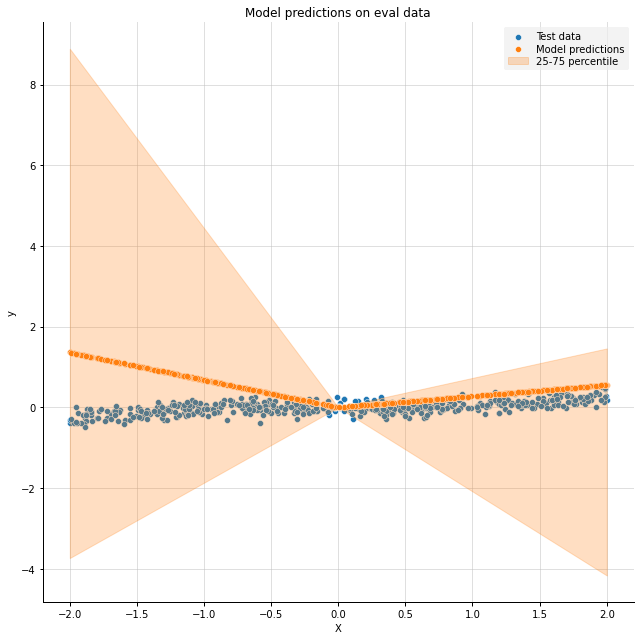

In [114]:
fig, ax = plt.subplots(1, 1, figsize=(9,9))

sns.scatterplot(y=y_te, x=x_te, label="Test data", ax=ax, 
            color=colors[0])

sns.scatterplot(y=y_preds, x=x_te, label="Model predictions", ax=ax, 
            color=colors[1])

ax.legend()
# ax.set_xlabel(f'{}')
# ax.set(ylim=(0.60, 1.01), xlim=(-0.005, 0.20))
ax.set_xlabel("X")
ax.set_ylabel("y")
ax.set_title("Model predictions on eval data")
ax.legend(loc='upper right', prop={'size': 12})

x_te_sorted, q1, q2 = zip(*sorted(zip(x_te, quartiles[1, :], quartiles[2, :])))
ax.fill_between(x_te_sorted, q1, q2, color='tab:orange', alpha=0.25, label="25-75 percentile")

plot.tweak(ax)

In [ ]:
x